<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PYTHON EXERCISE : TIME SERIES ARIMA

 Analyze data shampoo sales.csv
- identified data pattern
- build ACF PACF plot until second differencing
- identified the most suitable model based on ACF PACF plot
- build ARIMA(2,1,0) model
- forecast for 6 periods ahead

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [ ]:
shampoo_sales = pd.read_csv('shampo sales.csv')

In [ ]:
shampoo_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


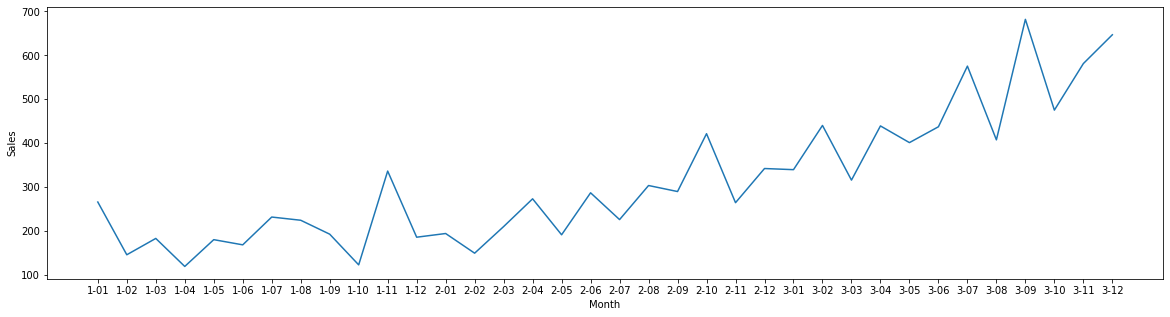

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x='Month', y='Sales', data=shampoo_sales)
plt.show()

Differencing

In [ ]:
shampoo_sales_diff = shampoo_sales.copy()
shampoo_sales_diff['Sales_diff1'] = shampoo_sales_diff['Sales'].diff(1)
shampoo_sales_diff['Sales_diff2'] = shampoo_sales_diff['Sales'].diff(2)

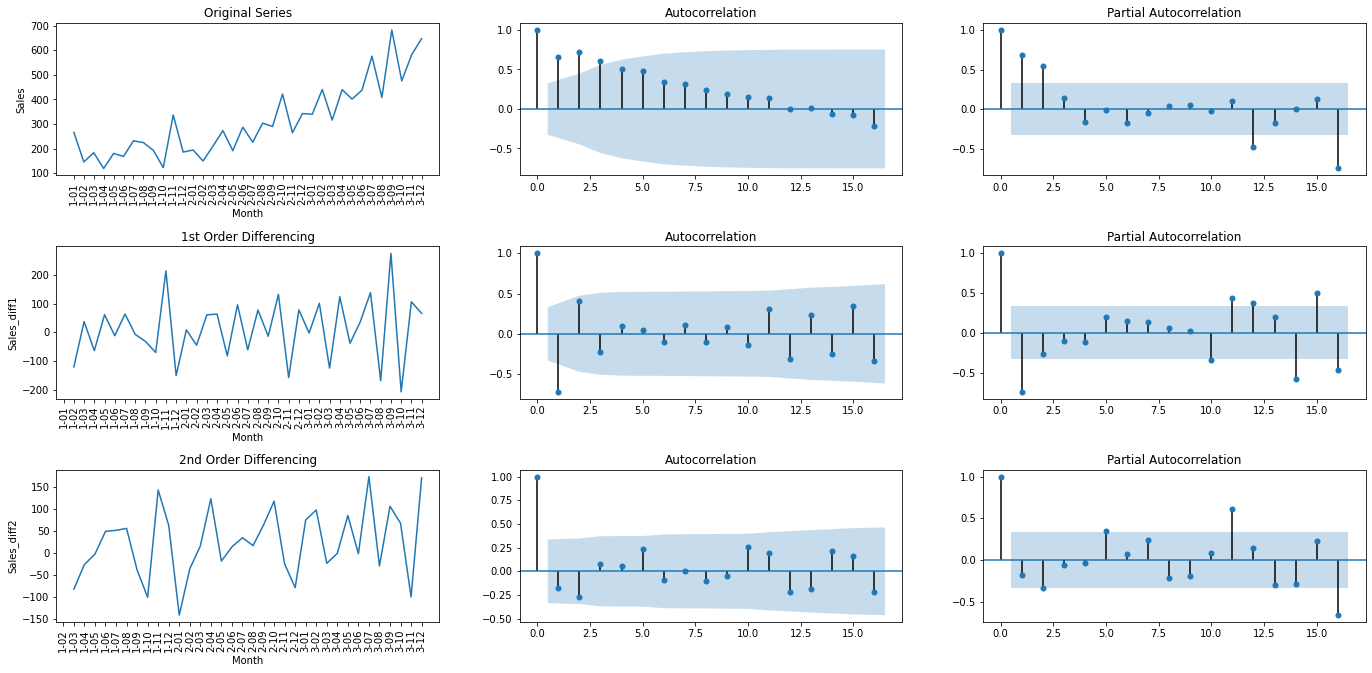

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(20,10))
fig.tight_layout(pad=5.0)

#Differencing Original Seried
sns.lineplot(ax=ax[0,0], x='Month', y='Sales', data=shampoo_sales_diff)
ax[0,0].set_title('Original Series')
ax[0,0].tick_params(axis='x', rotation=90)
plot_acf(shampoo_sales_diff['Sales'], ax=ax[0,1])
ax[0,1].set_title('Autocorrelation')
plot_pacf(shampoo_sales_diff['Sales'], ax=ax[0,2])
ax[0,2].set_title('Partial Autocorrelation')

#Differencing 1st Order
sns.lineplot(ax=ax[1,0], x='Month', y='Sales_diff1', data=shampoo_sales_diff)
ax[1,0].set_title('1st Order Differencing')
ax[1,0].tick_params(axis='x', rotation=90)
plot_acf(shampoo_sales_diff['Sales_diff1'].dropna(), ax=ax[1,1])
ax[1,1].set_title('Autocorrelation')
plot_pacf(shampoo_sales_diff['Sales_diff1'].dropna(), ax=ax[1,2])
ax[1,2].set_title('Partial Autocorrelation')

sns.lineplot(ax=ax[2,0], x='Month', y='Sales_diff2', data=shampoo_sales_diff)
ax[2,0].set_title('2nd Order Differencing')
ax[2,0].tick_params(axis='x', rotation=90)
plot_acf(shampoo_sales_diff['Sales_diff2'].dropna(), ax=ax[2,1])
ax[2,1].set_title('Autocorrelation')
plot_pacf(shampoo_sales_diff['Sales_diff2'].dropna(), ax=ax[2,2])
ax[2,2].set_title('Partial Autocorrelation')

plt.show()

In [ ]:
arima = ARIMA(shampoo_sales_diff['Sales'], order=(2,1,0))
arima_fitted = arima.fit()

In [ ]:
forecast_result = arima_fitted.forecast(6)
forecast_result[0]

array([568.90826796, 652.48163197, 623.37095423, 650.40207291,
       661.22814491, 668.09917223])

## PYTHON EXERCISE : TIME SERIES WITH FEATURE ENGINEERING

In [ ]:
df = pd.read_csv('opsd_germany_daily.csv')

In [ ]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


In [ ]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day,Weekday
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1,6
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,2,0
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,3,1
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,4,2
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,5,3


One hot encoder

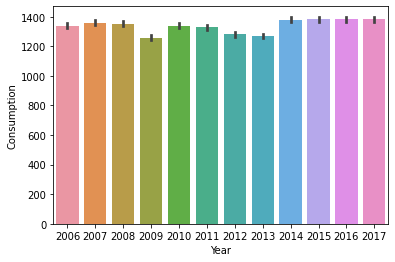

In [ ]:
sns.barplot(x = 'Year',y = 'Consumption',data = df)
plt.show()

In [ ]:
#Splitting Data Training
feature = ['Year','Month','Day','Weekday']
df_train = df[df['Year']<2016]
X_train = df_train[feature]
y_train = df_train['Consumption']

In [ ]:
#Splitting Data test
df_test = df[df['Year']>=2016]
X_test = df_test[feature]
y_test = df_test['Consumption']

In [ ]:
#One Hot Encoder
transformer = ColumnTransformer([('OneHotEncoder',OneHotEncoder(drop = 'first'),['Month','Day','Weekday'])],remainder = 'passthrough')

In [ ]:
transformer.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('OneHotEncoder',
                                 OneHotEncoder(categories='auto', drop='first',
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['Month', 'Day', 'Weekday'])],
                  verbose=False)

In [ ]:
X_train_pre = transformer.transform(X_train)
X_test_pre = transformer.transform(X_test)

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
regression_results(y_test, y_pred)

explained_variance:  0.3683
mean_squared_log_error:  0.0098
r2:  0.2855
MAE:  110.6476
MSE:  18749.5897
RMSE:  136.9291
